# RNN Model with crf

In [2]:
import rnn_dataset
import rnn_classifier
from crf import CRF
import torch
from data_utils import Vocabulary
from torch.utils.data import Dataset, DataLoader, random_split
from collections import Counter
import itertools
import torch.nn as nn
from tqdm import tqdm
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
from torch.nn.utils.rnn import pad_sequence
import pyconll


In [2]:
#define the hyperparameters
batch_size    = 16
lr            = 1e-3
device        = "cpu"
epochs        = 30
emb_size      = 64
hidden_size   = 64
nb_layers     = 1
drop_out      = 0.1

In [3]:
trainset     = rnn_dataset.RnnDataset("corpus/train.conllu",  isTrain = True)
testset      = rnn_dataset.RnnDataset("corpus/test.conllu")

token Vocab size 35693
token Vocab size 35693


In [4]:
for x, tag in trainset.get_loader(shuffle = True):
    print(list(trainset.tags_vocab.rev_lookup(int(t)) for t in tag.squeeze(0)))
    break
    

['B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', '<pad>']


In [5]:
model = rnn_classifier.MweRNN(
    name         = "RNN",
    toks_vocab   = trainset.toks_vocab,
    tags_vocab   = trainset.tags_vocab, 
    emb_size     = emb_size, 
    hidden_size  = hidden_size, 
    drop_out     = drop_out)

In [6]:
model.train_model(trainset,testset, epochs= epochs, lr=lr, batch_size = batch_size, split_train=0.8)

100%|████████████████████████████████████████| 146/146 [00:01<00:00, 124.18it/s]


Epoch 0 | Mean train loss  3.2321 |  Mean dev loss  0.9045 



100%|████████████████████████████████████████| 146/146 [00:01<00:00, 123.29it/s]


Epoch 1 | Mean train loss  0.7118 |  Mean dev loss  0.7810 



100%|█████████████████████████████████████████| 146/146 [00:01<00:00, 97.71it/s]


Epoch 2 | Mean train loss  0.6324 |  Mean dev loss  0.7325 



100%|█████████████████████████████████████████| 146/146 [00:01<00:00, 97.33it/s]


Epoch 3 | Mean train loss  0.5968 |  Mean dev loss  0.6846 



100%|█████████████████████████████████████████| 146/146 [00:01<00:00, 95.96it/s]


Epoch 4 | Mean train loss  0.5635 |  Mean dev loss  0.6643 



100%|█████████████████████████████████████████| 146/146 [00:01<00:00, 95.65it/s]


Epoch 5 | Mean train loss  0.5342 |  Mean dev loss  0.6292 



100%|████████████████████████████████████████| 146/146 [00:01<00:00, 105.39it/s]


Epoch 6 | Mean train loss  0.5072 |  Mean dev loss  0.6016 



100%|████████████████████████████████████████| 146/146 [00:01<00:00, 107.09it/s]


Epoch 7 | Mean train loss  0.4674 |  Mean dev loss  0.5624 



100%|█████████████████████████████████████████| 146/146 [00:02<00:00, 71.83it/s]


Epoch 8 | Mean train loss  0.4358 |  Mean dev loss  0.5270 



100%|█████████████████████████████████████████| 146/146 [00:02<00:00, 71.25it/s]


Epoch 9 | Mean train loss  0.3993 |  Mean dev loss  0.4900 



100%|█████████████████████████████████████████| 146/146 [00:01<00:00, 90.39it/s]


Epoch 10 | Mean train loss  0.3554 |  Mean dev loss  0.4681 



100%|█████████████████████████████████████████| 146/146 [00:01<00:00, 86.56it/s]


Epoch 11 | Mean train loss  0.3137 |  Mean dev loss  0.4669 



100%|█████████████████████████████████████████| 146/146 [00:01<00:00, 98.64it/s]


Epoch 12 | Mean train loss  0.2786 |  Mean dev loss  0.4349 



100%|█████████████████████████████████████████| 146/146 [00:01<00:00, 91.90it/s]


Epoch 13 | Mean train loss  0.2470 |  Mean dev loss  0.4271 



100%|█████████████████████████████████████████| 146/146 [00:01<00:00, 91.71it/s]


Epoch 14 | Mean train loss  0.2155 |  Mean dev loss  0.4409 



100%|████████████████████████████████████████| 146/146 [00:01<00:00, 101.31it/s]


Epoch 15 | Mean train loss  0.1868 |  Mean dev loss  0.4785 



100%|████████████████████████████████████████| 146/146 [00:01<00:00, 101.16it/s]


Epoch 16 | Mean train loss  0.1655 |  Mean dev loss  0.4420 



100%|█████████████████████████████████████████| 146/146 [00:01<00:00, 96.48it/s]


Epoch 17 | Mean train loss  0.1369 |  Mean dev loss  0.4556 



 95%|███████████████████████████████████████  | 139/146 [00:01<00:00, 93.41it/s]


KeyboardInterrupt: 

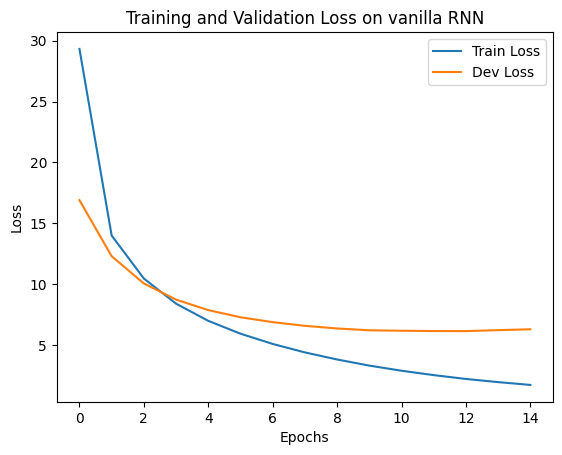

In [3]:
train_losses = [29.3152, 14.0053, 10.4767, 8.4147, 7.0056, 5.9513, 5.1115, 4.4160, 3.8356, 3.3329, 2.9125, 2.5532, 2.2376, 1.9778, 1.7487]
dev_losses = [16.9078, 12.3065, 10.0737, 8.7474, 7.8867, 7.2984, 6.8999, 6.5963, 6.3799, 6.2297, 6.1948, 6.1680, 6.1652, 6.2417, 6.3141]

epochs = range(len(train_losses))

plt.plot(epochs, train_losses, label='Train Loss')
plt.plot(epochs, dev_losses, label='Dev Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss on vanilla RNN')
plt.legend()
plt.show()


In [16]:
model.save(".","rnn_mod_bi.pth")

In [7]:
TP, FP, FN, average_precision, average_recall, average_f1_score, weighted_f1_score, weighted_recall, weighted_precision = model.evaluate(testset.get_loader(batch_size = 500))

100%|█████████████████████████████████████████████| 4/4 [00:03<00:00,  1.03it/s]


In [15]:
print(weighted_f1_score)
print(weighted_recall)
print(weighted_recall)

tensor(0.9874)
tensor(0.9990)
tensor(0.9990)


# Attention Layer + RNN + CRF decoder

In [2]:
#define the hyperparameters
batch_size    = 16
lr            = 1e-3
device        = "cpu"
epochs        = 30
emb_size      = 64
hidden_size   = 64
drop_out      = 0.1

In [3]:
trainset     = rnn_dataset.RnnDataset("corpus/train.conllu",  isTrain = True)
testset      = rnn_dataset.RnnDataset("corpus/test.conllu")

token Vocab size 35693
token Vocab size 35693


In [4]:
model = rnn_classifier.MweRNN(
    name         = "ATRNN",
    toks_vocab   = trainset.toks_vocab,
    tags_vocab   = trainset.tags_vocab, 
    emb_size     = emb_size, 
    hidden_size  = hidden_size, 
    drop_out     = drop_out)

In [ ]:
model.train_model(trainset,testset, epochs= epochs, lr=lr, batch_size = batch_size, split_train=0.8)

In [10]:
model.save(".", "attrnn_mod.pth")

In [6]:
TP, FP, FN, average_precision, average_recall, average_f1_score, weighted_f1_score, weighted_recall, weighted_precision = model.evaluate(testset.get_loader(batch_size=500))

100%|█████████████████████████████████████████████| 4/4 [00:04<00:00,  1.05s/it]


In [7]:
weighted_f1_score

tensor(0.9051)

In [8]:
weighted_recall

tensor(0.9186)

In [9]:
weighted_precision

tensor(0.8932)

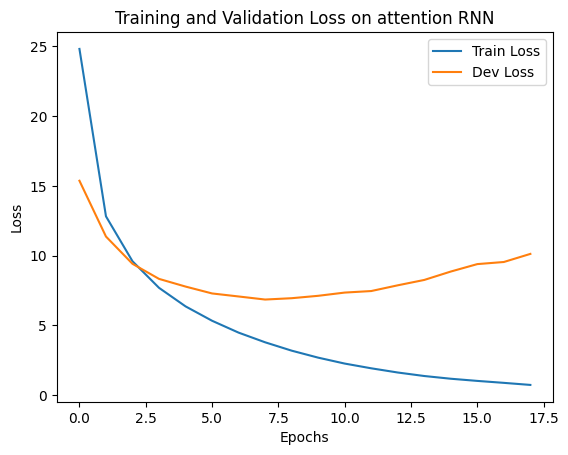

In [4]:
import matplotlib.pyplot as plt

train_losses = [24.8248, 12.8190, 9.5968, 7.6910, 6.3614, 5.3300, 4.4785, 3.7851, 3.1855, 2.6840, 2.2593, 1.9200, 1.6183, 1.3671, 1.1714, 1.0163, 0.8760, 0.7280]
dev_losses = [15.3704, 11.3691, 9.4127, 8.3325, 7.7818, 7.2882, 7.0712, 6.8513, 6.9470, 7.1188, 7.3503, 7.4608, 7.8713, 8.2566, 8.8591, 9.3926, 9.5438, 10.1247]

epochs = range(len(train_losses))

plt.plot(epochs, train_losses, label='Train Loss')
plt.plot(epochs, dev_losses, label='Dev Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss on attention RNN')
plt.legend()
plt.show()


In [39]:
print(sum(weighted_f1_score))
print(sum(weighted_recall))
print(sum(weighted_recall))

tensor(0.8878)
tensor(0.9098)
tensor(0.9098)


# LSTM layer - CRF

In [45]:
model = rnn_classifier.MweRNN(
    name         = "LSTM",
    toks_vocab   = trainset.toks_vocab,
    tags_vocab   = trainset.tags_vocab, 
    emb_size     = emb_size, 
    hidden_size  = hidden_size, 
    drop_out     = 0.)

In [ ]:
model.train_model(trainset,testset, epochs= epochs, lr=lr, batch_size = batch_size, split_train=0.8)

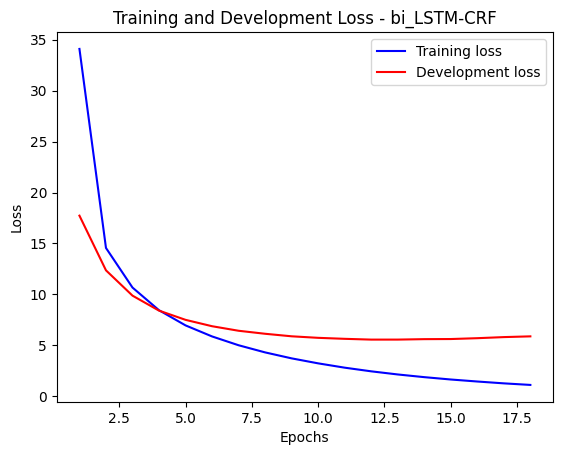

In [5]:
import matplotlib.pyplot as plt

train_loss = [34.0949, 14.5625, 10.6750, 8.4482, 6.9609, 5.8769, 5.0125, 4.3107, 3.7250, 3.2354, 2.8118, 2.4530, 2.1458, 1.8816, 1.6509, 1.4537, 1.2724, 1.1190]
dev_loss = [17.7306, 12.3647, 9.8812, 8.4105, 7.5054, 6.8801, 6.4344, 6.1387, 5.8906, 5.7404, 5.6429, 5.5663, 5.5674, 5.6112, 5.6222, 5.7055, 5.8125, 5.8855]

epochs = range(1, len(train_loss) + 1)

plt.plot(epochs, train_loss, 'b', label='Training loss')
plt.plot(epochs, dev_loss, 'r', label='Development loss')
plt.title('Training and Development Loss - bi_LSTM-CRF')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [56]:
TP, FP, FN, average_precision, average_recall, average_f1_score, weighted_f1_score, weighted_recall, weighted_precision = model.evaluate(testset.get_loader(batch_size=500))

100%|█████████████████████████████████████████████| 4/4 [00:04<00:00,  1.09s/it]


In [59]:
print(weighted_f1_score)
print(weighted_recall)
print(weighted_precision)

tensor(0.9051)
tensor(0.9198)
tensor(0.8952)


In [62]:
model.save(".", "lstm_crf_mod.pth")